# Shor Code Error Correction Implementation
This is an implementation of the shor code algorithm for quantum error correction. The shor code combines aspects of bit flip and phase flip codes to protect a quantum circuit from arbitrary errors.

## Step 0 - Imports

In [59]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator


## Step 1 - Initialise Circuit
We need 9 qubits; 8 are redundancy.

In [60]:
q = 9
c = 1
circuit = QuantumCircuit(q, c)

## Step 2 - Encoding
We copy over q0 with CNOTs.

In [61]:
circuit.cx(0, 3)
circuit.cx(0, 6)

## Step 3 - Phase Flip Protection
We use hadamard gates to protect against phase flips

In [62]:
circuit.h(0)
circuit.h(3)
circuit.h(6)

## Step 4 - Build Redundancy
We copy the 0 block to blocks 1 and 2 for redundancy.

In [63]:
for i in [0, 3, 6]:
    for j in [1, 2]:
        circuit.cx(i, i + j)

# circuit.cx(0, 1)
# circuit.cx(0, 2)

# circuit.cx(3, 4)
# circuit.cx(3, 5)

# circuit.cx(6, 7)
# circuit.cx(6, 8)

circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'q'), 0), Qubit(QuantumRegister(9, 'q'), 1), Qubit(QuantumRegister(9, 'q'), 2), Qubit(QuantumRegister(9, 'q'), 3), Qubit(QuantumRegister(9, 'q'), 4), Qubit(QuantumRegister(9, 'q'), 5), Qubit(QuantumRegister(9, 'q'), 6), Qubit(QuantumRegister(9, 'q'), 7), Qubit(QuantumRegister(9, 'q'), 8)), clbits=())

## Step 5 - Simulate Errors
We deliberately bit and phase flip an error on qubit 3

In [64]:
circuit.x(0)
circuit.z(0)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=9, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(9, 'q'), 0), Qubit(QuantumRegister(9, 'q'), 1), Qubit(QuantumRegister(9, 'q'), 2), Qubit(QuantumRegister(9, 'q'), 3), Qubit(QuantumRegister(9, 'q'), 4), Qubit(QuantumRegister(9, 'q'), 5), Qubit(QuantumRegister(9, 'q'), 6), Qubit(QuantumRegister(9, 'q'), 7), Qubit(QuantumRegister(9, 'q'), 8)), clbits=())

## Step 6 - Error Detection and Correction

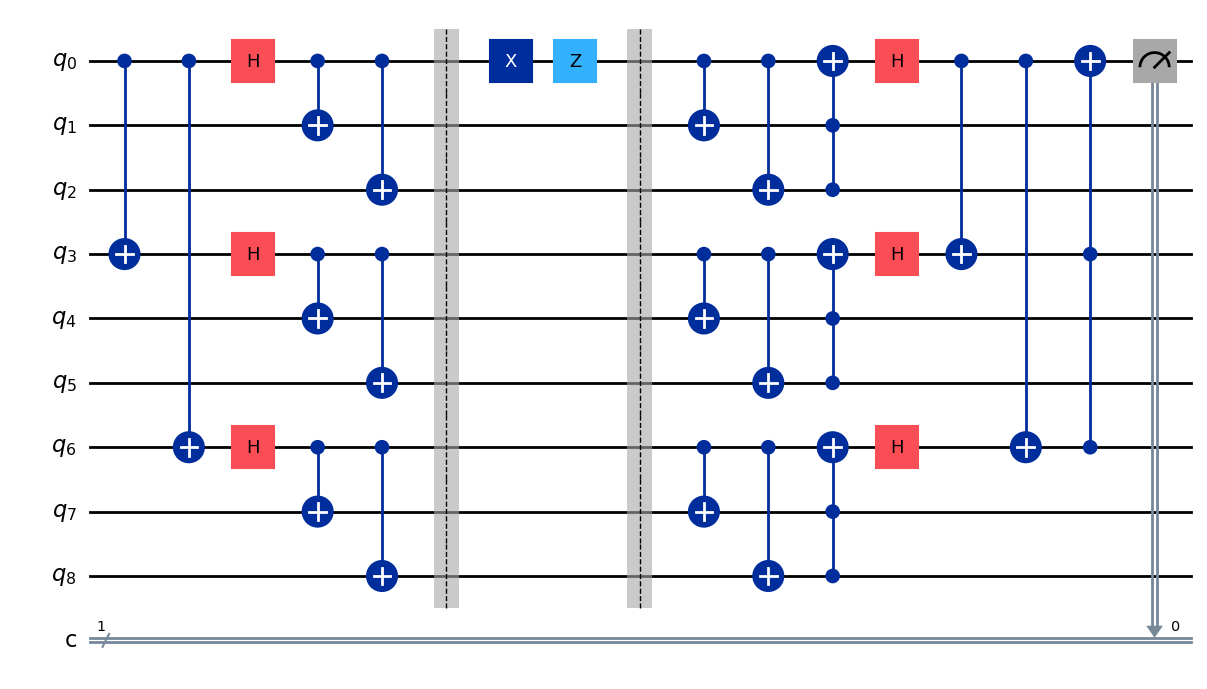

In [65]:

for i in [0, 3, 6]:
    for j in [1, 2]:
        circuit.cx(i, i + j)
    circuit.ccx(i + 2, i + 1, i)



# Phase flip error detection: decode and apply hadamard to bring them out of superposition
circuit.h(0)
circuit.h(3)
circuit.h(6)

# Parity checks for phase flip error
circuit.cx(0, 3)
circuit.cx(0, 6)

circuit.ccx(6, 3, 0)

circuit.measure(0, 0)

circuit.draw('mpl')


## Step 7 - Simulate
This returns 0 even though we flipped the bit.

In [66]:
simulator = AerSimulator()
circuit = transpile(circuit, simulator)

result = simulator.run(circuit).result()
counts = result.get_counts(circuit)

print(counts)

{'0': 1024}
